In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os


0: 384x640 1 person, 10.2ms
Speed: 2.5ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


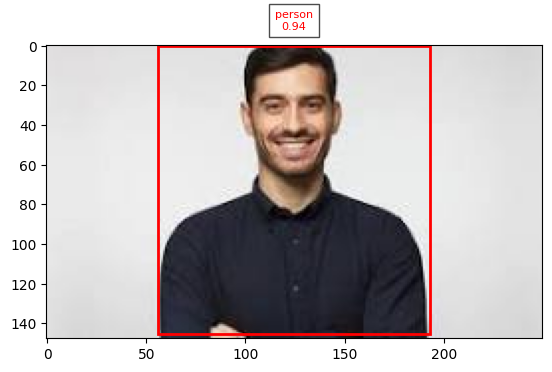

In [ ]:

import torch

def yolo(imgpath):
    # Load the YOLOv8 model
    model = YOLO("yolov8n.pt")

    # Open the image using PIL
    im1 = Image.open(imgpath)

    # Create a Matplotlib subplot for visualizing the image
    fig, ax = plt.subplots(1)
    ax.imshow(im1)

    # Process results from the model
    results = model.predict(im1)
    detected_objects = []

    # Iterate over the results
    for result in results:
        boxes = result.boxes

        # Iterate over each detected box, confidence, and class ID
        for box, conf, class_id in zip(boxes.xyxy, boxes.conf, boxes.cls):
            # Move tensors to CPU and convert to NumPy
            box = box.cpu().numpy()
            conf = conf.cpu().numpy()
            class_id = class_id.cpu().numpy()

            x1, y1, x2, y2 = box
            x, y, w, h = x1, y1, x2 - x1, y2 - y1
            class_index = int(class_id)
            class_name = model.names[class_index]
            detected_objects.append({
                'label': class_name,
                'confidence': conf,
                'box': (x, y, w, h),
            })

            # Draw bounding box
            rect = plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)

            # Calculate position for the text
            text_x = x + 0.5 * w
            text_y = y - 0.05 * h

            # Add text above the bounding box
            ax.text(text_x, text_y, f'{class_name}\n{conf:.2f}', color='red',
                    fontsize=8, ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.7))

    # Display the image with bounding boxes
    plt.show()

# Example usage
imgpath = '/content/download (2).jpeg'
yolo(imgpath)
